In [1]:
import pickle


In [2]:
 with open('/mnt/disk4/handsign_project/son_data/Experiment/Embedding/all_embeddings_i3d_threeviews_all_data.pkl', 'rb') as file:
           embedding = pickle.load(file)


In [3]:
 with open('/mnt/disk4/handsign_project/son_data/Experiment/Embedding/ground_truth_i3d_threeviews_all_data.pkl', 'rb') as file:
            gr_truth = pickle.load(file)


In [4]:
from sklearn.manifold import TSNE


In [6]:
embedding.shape

(28176, 3072)

In [7]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(embedding)


In [8]:
X_embedded.shape

(28176, 2)

In [9]:
len(gr_truth)

28176

In [10]:
import pandas as pd

df = pd.DataFrame(columns = ['t-sne-1', 't-sne-2', 'y'])

In [11]:
df['t-sne-1'] = X_embedded[:,0]
df['t-sne-2'] = X_embedded[:,1]

In [12]:
df['y'] = gr_truth

In [13]:
df[
    'y'].value_counts().to_dict()

{349: 33,
 274: 33,
 390: 32,
 309: 32,
 311: 32,
 312: 32,
 314: 32,
 318: 32,
 319: 32,
 320: 32,
 328: 32,
 329: 32,
 333: 32,
 340: 32,
 343: 32,
 344: 32,
 354: 32,
 306: 32,
 356: 32,
 359: 32,
 363: 32,
 367: 32,
 368: 32,
 371: 32,
 375: 32,
 399: 32,
 398: 32,
 397: 32,
 382: 32,
 394: 32,
 393: 32,
 385: 32,
 307: 32,
 322: 32,
 386: 32,
 291: 32,
 271: 32,
 270: 32,
 283: 32,
 285: 32,
 287: 32,
 273: 32,
 296: 32,
 255: 31,
 360: 31,
 383: 31,
 395: 31,
 350: 31,
 381: 31,
 352: 31,
 266: 31,
 358: 31,
 361: 31,
 372: 31,
 264: 31,
 379: 31,
 342: 31,
 259: 31,
 258: 31,
 370: 31,
 378: 31,
 366: 31,
 298: 31,
 310: 31,
 303: 31,
 338: 31,
 313: 31,
 279: 31,
 288: 31,
 302: 31,
 281: 31,
 308: 31,
 327: 31,
 321: 31,
 387: 31,
 326: 31,
 374: 30,
 292: 30,
 293: 30,
 339: 30,
 252: 30,
 218: 30,
 224: 30,
 242: 30,
 240: 30,
 238: 30,
 300: 30,
 232: 30,
 251: 30,
 315: 30,
 289: 30,
 369: 30,
 276: 30,
 286: 30,
 265: 30,
 325: 30,
 357: 30,
 355: 30,
 267: 30,
 351: 30,


In [43]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Hàm tính khoảng cách trung bình giữa các điểm trong một cụm
def mean_distance_in_cluster(df_cluster):
    # Lấy tọa độ của các điểm trong cụm
    coords = df_cluster[['t-sne-1', 't-sne-2']].values
    # Tính khoảng cách giữa tất cả các cặp điểm trong cụm
    if len(coords) > 1:
        distances = pdist(coords, metric='euclidean')
        return np.mean(distances)
    else:
        return 0

# Nhóm theo từng cụm 'y' và tính khoảng cách trung bình
cluster_mean_distances = df.groupby('y').apply(mean_distance_in_cluster)

# Lấy top 10 cụm có khoảng cách trung bình nhỏ nhất
top_10_clusters = cluster_mean_distances.nsmallest(50).index

# Lọc DataFrame để chỉ lấy các điểm trong top 10 cụm này
top_10_clearly_clustered_df = df[df['y'].isin(top_10_clusters)]

print(top_10_clearly_clustered_df)


          t-sne-1    t-sne-2    y
2      -69.446831  23.398066    2
27      53.540062  39.010357   29
31      51.057621  62.336456   33
60     -67.315666 -10.803397   62
76     -30.065477 -95.116852   78
...           ...        ...  ...
28082    1.072602 -60.210503  905
28108    4.043272   4.534037  931
28135   62.500084  36.731861  958
28139  -74.118225 -15.818456  962
28167  105.104752  19.487925  991

[1409 rows x 3 columns]


In [31]:
# Tạo một Series chứa số lượng xuất hiện của từng giá trị trong cột 'y'
value_counts = df['y'].value_counts()

# Lấy ra top 10 giá trị có số lượng lớn nhất
top_10_values = value_counts.nlargest(30).index

# Lọc DataFrame để chỉ chứa các hàng có giá trị 'y' thuộc top 10
top_10_df = df[df['y'].isin(top_10_values)]

print(top_10_df)


         t-sne-1    t-sne-2    y
865    37.799252  76.637291  274
896   -39.867195 -30.029509  306
899    -3.594489 -27.205454  309
901    56.629162 -14.831399  311
902    -0.108327  32.586746  312
...          ...        ...  ...
26032  79.199928 -24.657576  390
26036 -30.637989 -14.651532  394
26039  63.629719  68.735252  397
26040  55.825890  59.289879  398
26041  88.835709 -48.822475  399

[962 rows x 3 columns]


In [41]:
top_10_clearly_clustered_df[
    'y'].value_counts().to_dict()

{343: 32,
 382: 32,
 385: 32,
 397: 32,
 287: 32,
 423: 30,
 391: 30,
 485: 30,
 472: 30,
 426: 30,
 415: 29,
 417: 29,
 420: 29,
 2: 29,
 457: 29,
 471: 29,
 490: 29,
 491: 29,
 519: 29,
 522: 29,
 12: 29,
 454: 29,
 531: 29,
 95: 29,
 124: 29,
 55: 29,
 29: 29,
 78: 29,
 91: 29,
 23: 29,
 18: 29,
 97: 29,
 99: 29,
 122: 29,
 125: 29,
 134: 29,
 141: 29,
 187: 29,
 49: 29,
 755: 28,
 530: 28,
 723: 28,
 734: 28,
 487: 28,
 463: 28,
 698: 28,
 676: 28,
 229: 28,
 808: 28,
 246: 28,
 810: 28,
 819: 28,
 829: 28,
 882: 28,
 885: 28,
 904: 28,
 905: 28,
 908: 28,
 664: 28,
 658: 28,
 164: 28,
 447: 28,
 547: 28,
 222: 28,
 603: 28,
 598: 28,
 305: 28,
 62: 28,
 33: 28,
 554: 28,
 400: 28,
 443: 28,
 445: 28,
 799: 27,
 646: 27,
 185: 27,
 931: 27,
 932: 27,
 768: 27,
 764: 27,
 746: 27,
 693: 27,
 560: 27,
 595: 27,
 748: 27,
 672: 27,
 605: 27,
 662: 27,
 625: 26,
 988: 26,
 551: 26,
 716: 26,
 991: 26,
 584: 26,
 952: 26,
 958: 26,
 996: 25,
 962: 24,
 615: 24,
 456: 24}

In [21]:
filtered_df = df[(df['y'] >= 0) & (df['y'] <= 2)]


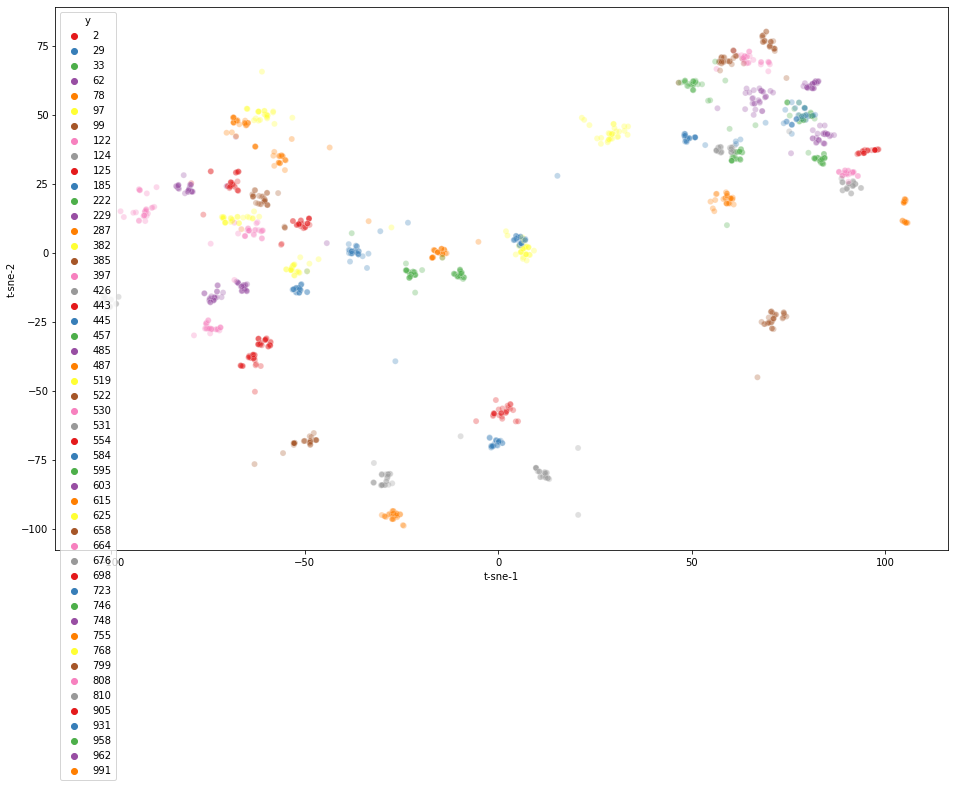

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="t-sne-1", y="t-sne-2",
    hue="y",
    palette=sns.color_palette("Set1", 50),  # Thay đổi bảng màu ở đây
    data=top_10_clearly_clustered_df,
    legend="full",
    alpha=0.3
)
plt.show()

<AxesSubplot:xlabel='t-sne-1', ylabel='t-sne-2'>

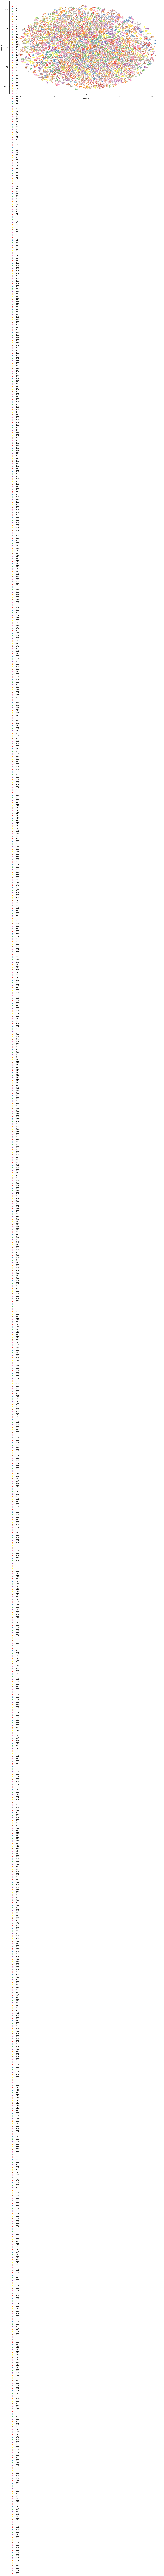

In [35]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="t-sne-1", y="t-sne-2",
    hue="y",
    palette=sns.color_palette("Set1", 1000),
    data=df,
    legend="full",
    alpha=0.3
)
